# Prediction of house prices using supervised learning

We shall use the concept of **linear regression** in supervised learning to predict house prices using different attributes.


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

## House Sales in King County, USA

| Variable      | Description                                                                                                 |
| ------------- | ----------------------------------------------------------------------------------------------------------- |
| id            | A notation for a house                                                                                      |
| date          | Date house was sold                                                                                         |
| price         | Price is prediction target                                                                                  |
| bedrooms      | Number of bedrooms                                                                                          |
| bathrooms     | Number of bathrooms                                                                                         |
| sqft_living   | Square footage of the home                                                                                  |
| sqft_lot      | Square footage of the lot                                                                                   |
| floors        | Total floors (levels) in house                                                                              |
| waterfront    | House which has a view to a waterfront                                                                      |
| view          | Has been viewed                                                                                             |
| condition     | How good the condition is overall                                                                           |
| grade         | overall grade given to the housing unit, based on King County grading system                                |
| sqft_above    | Square footage of house apart from basement                                                                 |
| sqft_basement | Square footage of the basement                                                                              |
| yr_built      | Built Year                                                                                                  |
| yr_renovated  | Year when house was renovated                                                                               |
| zipcode       | Zip code                                                                                                    |
| lat           | Latitude coordinate                                                                                         |
| long          | Longitude coordinate                                                                                        |
| sqft_living15 | Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area |
| sqft_lot15    | LotSize area in 2015(implies-- some renovations)                                                            |


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model


In [35]:
global xtrain, xtest, ytrain, ytest, train_x, train_y

Importing the data set

In [36]:
file_name = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
dff = pd.read_csv(file_name)
display(dff)

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


<br>

#### Let us find out whether there is any relation between various attributes and the price of the house. We shall fit a linear regression model to predict <code>price</code>. Then we shall test the model using 20% of the data set.

Function to **train** the model against a specific attribute:

In [37]:
def train(a):
    global xtrain, xtest, ytrain, ytest, train_x, train_y, regr
    xtrain, xtest, ytrain, ytest = train_test_split(dff, dff, test_size=.2, random_state=4)

    regr = linear_model.LinearRegression()
    train_x = np.asanyarray(xtrain[[a]])
    train_y = np.asanyarray(xtrain[['price']])
    regr.fit(train_x, train_y)
    print("Coefficients: ", regr.coef_)
    print("Intercept: ", regr.intercept_)

Function to **test** the model against a specific attribute:

In [38]:
def test(a):
    global xtrain, xtest, ytrain, ytest, train_x, train_y, regr
    test_x = np.asanyarray(xtest[[a]])
    test_y = np.asanyarray(xtest[["price"]])
    test_y_ = regr.predict(test_x)
    mae= np.mean(np.absolute(test_y_ - test_y))
    mae_=mae/21613
    mse=np.mean((test_y_ - test_y) ** 2)
    mse_=mse/21613
    print("Mean absolute error: " , mae_)
    print("Residual sum of squares (MSE): " ,mse_ )


<br>

### **1. Square footage** - price increases with square footage but less accurate

Coefficients:  [[281.83375216]]
Intercept:  [-45850.76735561]


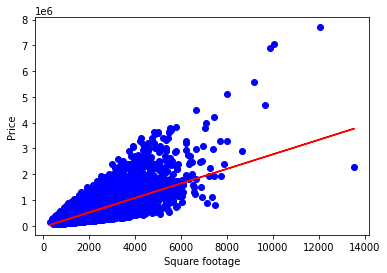

Mean absolute error:  8.01952622105321
Residual sum of squares (MSE):  3093754.956167733


In [39]:
train("sqft_living")
plt.scatter(xtrain.sqft_living, xtrain.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Square footage")
plt.ylabel("Price")
plt.show()

test("sqft_living")

<br>

### **2. Latitude and longitude** - price increases slightly with latitude, but not significant

#### Latitude

Coefficients:  [[819022.45514088]]
Intercept:  [-38412402.09432663]


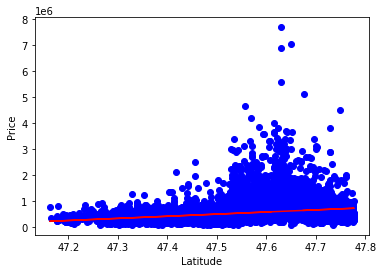

Mean absolute error:  9.80146425751045
Residual sum of squares (MSE):  5435902.220352279


In [40]:
train("lat")
plt.scatter(xtrain.lat, xtrain.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Latitude")
plt.ylabel("Price")
plt.show()

test("lat")


#### Longitude

Coefficients:  [[54088.18719313]]
Intercept:  [7150143.46794982]


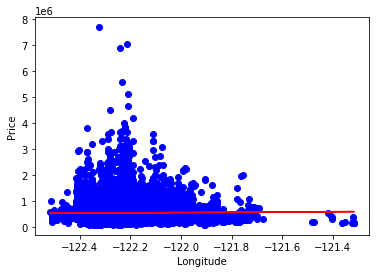

Mean absolute error:  10.6959858198308
Residual sum of squares (MSE):  5980522.963738343


In [41]:
train("long")
plt.scatter(xtrain.long, xtrain.price,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Longitude")
plt.ylabel("Price")
plt.show()

test("long")

<br>

### **3. Year built and year renovated** - No apparent pattern

#### Year built

Coefficients:  [[697.1750466]]
Intercept:  [-834300.80646315]


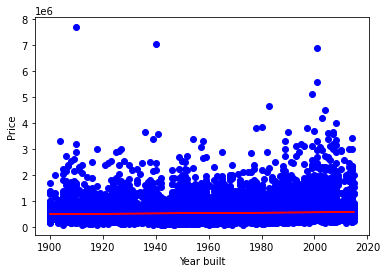

Mean absolute error:  10.717044686716456
Residual sum of squares (MSE):  5971218.483604367


In [42]:
train("yr_built")
plt.scatter(xtrain.yr_built, xtrain.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Year built")
plt.ylabel("Price")
plt.show()

test("yr_built")

#### Year renovated

Coefficients:  [[120.14084136]]
Intercept:  [529627.87409569]


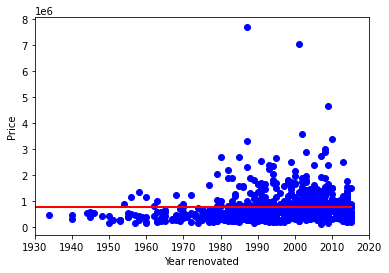

Mean absolute error:  15.908569427916197
Residual sum of squares (MSE):  8323423.5025902735


In [43]:
train("yr_renovated")
plt.scatter(xtrain.yr_renovated, xtrain.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Year renovated")
plt.ylabel("Price")
plt.xlim([1930,2020])
plt.show()

test("yr_built")

<br>

### **4. Grade** - price increases with grade

Coefficients:  [[209349.23305535]]
Intercept:  [-1062636.76835037]


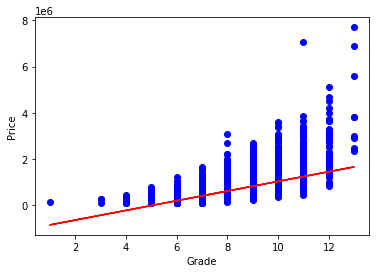

Mean absolute error:  8.06806253753839
Residual sum of squares (MSE):  3326854.9254775858


In [44]:
train("grade")
plt.scatter(xtrain.grade, xtrain.price, color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Grade")
plt.ylabel("Price")
plt.show()

test("grade")


<br>

# Observations
In the attributes in which there is a pattern, there seems to be a best fit line but the tests give significant errors. This is because we have used **linear regression** model to predict the value of <code>price</code>, which is not very accurate. 